In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split


#### 1. Create synthetic dataset
- n_sample - No. of data points
- n_features - No. of features for each data point 
- n_centers - No. of clustering centers/classes
- cluster_std - Standard deviation of each cluster
- random_state - Seed for random number generation 

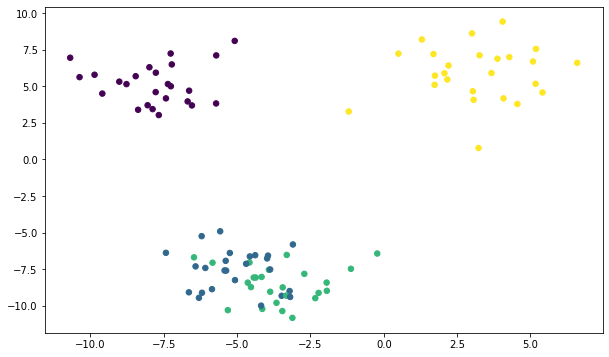

In [21]:
# Create synthetic dataset
X, y = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1.5, random_state=19)

# Visualize dataset with scatter plot
plt.figure(figsize = (10,6))
plt.scatter(X[:,0], X[:,1], c=y, marker= 'o', s=30)
plt.show()

#### 2. Split the synthetic dataset created earlier, into a training and test dataset. 

In [22]:
# Split synthetic dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27)

X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((100, 2), (100,), (75, 2), (75,), (25, 2), (25,))

#### 3. For comparison purposes, create 2 kNN classifiers with different values of k i.e. 1 & 5.  

In [23]:
# Create 2 KNN classifiers (1 & 5) for comparison
knn1 = KNeighborsClassifier(n_neighbors=1) 
knn5 = KNeighborsClassifier(n_neighbors=5)

#### 4. Fit these classifiers using the training dataset.

In [24]:
# Fit both classifiers using training dataset
knn1.fit(X_train, y_train)
knn5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### 5. To test the trained classifiers, use them to predict the target values in test dataset created earlier.

In [25]:
# Predict 
y_pred_1 = knn1.predict(X_test)
y_pred_5 = knn5.predict(X_test)

#### 6. To evaluate the accuracy of the classifiers, compare the predicted values against the actual values of the test dataset.

In [26]:
from sklearn.metrics import accuracy_score

# Evaluate the accuracy of the predictions
print('Accuracy of kNN with k=1', accuracy_score(y_test, y_pred_1))
print('Accuracy of kNN with k=5', accuracy_score(y_test, y_pred_5))

Accuracy of kNN with k=1 0.8
Accuracy of kNN with k=5 0.88


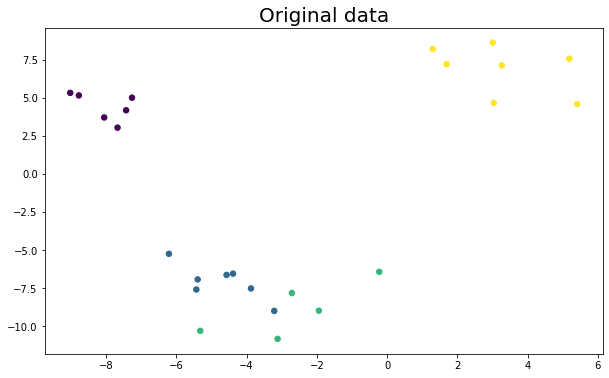

In [27]:
# Visualize data points of original test dataset
plt.figure(figsize = (10,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker= 'o', s=30)
plt.title('Original data', fontsize=20)
plt.show()

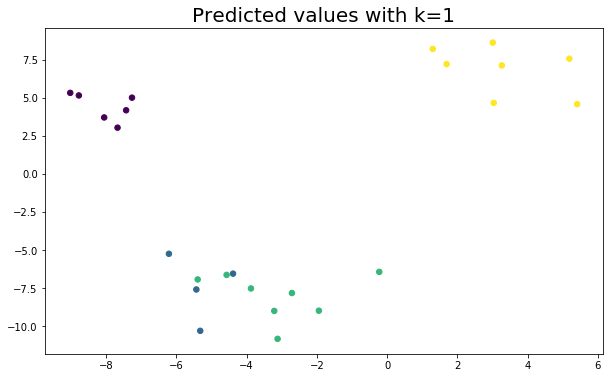

In [28]:
# Visualize data points of test dataset with predicted values using k=1
plt.figure(figsize = (10,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_1, marker= 'o', s=30)
plt.title('Predicted values with k=1', fontsize=20)
plt.show()

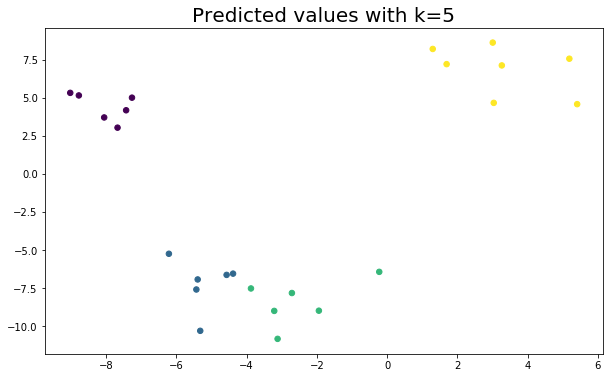

In [29]:
# Visualize data points of test dataset with predicted values using k=5
plt.figure(figsize = (10,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker= 'o', s=30)
plt.title('Predicted values with k=5', fontsize=20)
plt.show()

#### 7. Visualizing the actual values against predicted values. 

The predicted values are the class labels (0, 1, 2, 3) each data point belongs to, as denoted by the different colors of the points on the scatter plot.  The plots of the original values, and k=1, k=5, predicted values look largely similar due to the small number of data points (25).  However, even with a small dataset, k=1 and k=5 classsifiers predicted some data points differently (circled in red). 

![test_original.png](test_original.png)
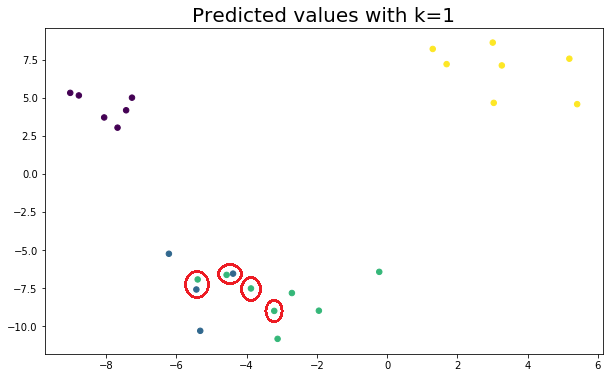
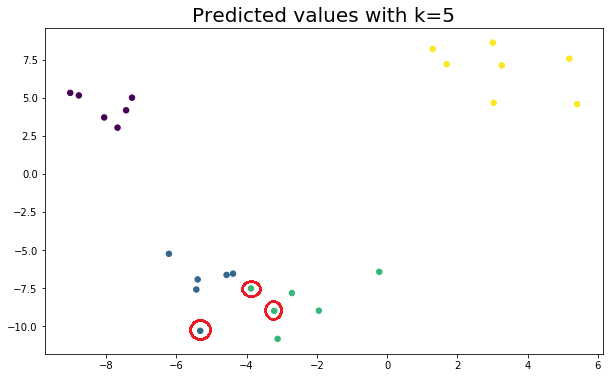
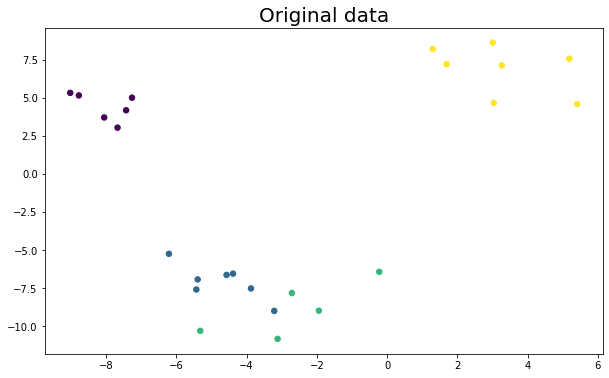

#### 8. Find the best k value

- When k is a small value, the kNN model become too specific and does not generalized well.  It achieves high accuracy score on the train dataset, but does poorly on the new unseen datasets. The model is over fitting.

- When k is a big value, the kNN model over generalizes. It has poor accuracy scores for both train and unseen datasets.  The model is under fitting.

- To determine the optimal value of k, we use the GridSearchCV function from the Scikit-learn module.

In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV

In [53]:
# Load the breast cancer wisconsin dataset in the Scikit-learn module 
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y=True)

In [54]:
X_cancer.shape, y_cancer.shape

((569, 30), (569,))

#### 9. Use Grid Search Cross Validation to find optimal k value
- GridSearchCV will split the breast cancer dataset into 5 subsets (cv=5).
- A kNN model will be created using each value of k from 1 to 20 i.e. 1, 2, 3 ... 19, 20 ('n_neighbors': np.arange(1,20)).
- For each model, GridSearchCV will iterate 5 times, each time using a different subset (out of the 5) as the test dataset, and the rest of the combined 4 subsets as the training dataset.
- The performance of 20 models will be evaluated against each other. The k value of the best model can then be determined and subsequently retrieved.  

In [55]:
# Create a Grid Search Cross Validation object to help perform an exhaustive search over k value range from 1 to 20.
knn_gscv = GridSearchCV(estimator = KNeighborsClassifier(), param_grid={'n_neighbors': np.arange(1,20)}, cv=5)

In [56]:
# Fit the Grid Searh CV with the breast cancer dataset
knn_gscv.fit(X_cancer, y_cancer)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [60]:
# Retrieve the k value of the best performing model
knn_gscv.best_params_, knn_gscv.best_score_

({'n_neighbors': 12}, 0.9332161687170475)

Using the value k=12, the best score achieved is 0.9332.

#### 10. The pros and cons of k-Nearest-Neigbors

10.1 Pros
- Simple, easy to use, to interpret and explain.
- It does not make any assumptions about the underlying dataset, so it can be used when the relationship between the features and outcome is non-linear.
- It can be used for regression and classification tasks.
- It can be used for classification of multiple classes.

10.2 Cons
- Computing performance, in terms of speed and memory, are adversely affected as the size of dataset increases.
- As the model needs to store all data points, the speed will decrease, while memory resource required will increase, with increasing dataset size. 
- As outliers not discarded, they may skew the results of the model.


        